# Data Exploration

In this notebook, we will explore the data provided in the training set. We will view the images, contours and masks created from these contours. This exploration will better help us understand the data being used to train our CNN.

In [1]:
import sys
sys.path.append('..')
import os, glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from src import data

basedir="/Users/aksharkumar/Documents/mlndCapstone/trainingdata/TrainingSet"


In [2]:
p01dir = os.path.join(basedir, "patient01")

#print(p01dir)

imgdata = data.ImageData(p01dir)
print(imgdata.labels)
# print(len(imgdata.images))
#for key in imgdata.img_keys:
    #plt.figure(figsize=(10,5))
    #plt.subplot(1,2,1)
    #plt.imshow(imgdata.images[key], cmap=plt.cm.gray)
    #plt.plot(*imgdata.endo_contours[key])
    #plt.plot(*imgdata.epi_contours[key])
    #plt.axis("off")
    #plt.subplot(1,2,2)
    #plt.hist(imgdata.images[key],64,[0,256])
    #plt.show()

[80, 100, 108, 120, 128, 140, 148, 160, 168, 180, 188, 200, 208, 220, 228, 240]


## Histogram results
Based on the histograms of each individual image, it is clear that the pixel values are skewed right. Generally the darker pixels correspond with the background in the image. We can see that the majority of the images have dark pixels, so this visualization makes sense. One technique we could use would be to equalize the histogram and see the difference in images.

## Histogram Equalization

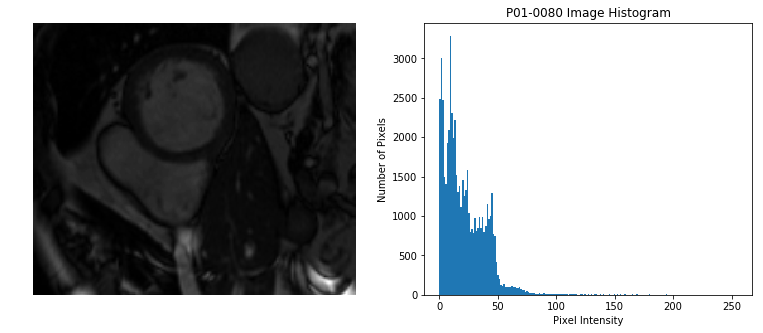

In [133]:
from skimage import exposure,img_as_float
image = imgdata.images[80]
img = np.asarray(255 * (image/image.max()), dtype='float64')

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(img, cmap=plt.cm.gray)
#plt.plot(*imgdata.endo_contours[80])
#plt.plot(*imgdata.epi_contours[80])
plt.axis("off")
plt.subplot(1,3,2)
plt.title('P01-0080 Image Histogram')
plt.ylabel('Number of Pixels')
plt.xlabel('Pixel Intensity')
plt.hist(img.ravel(),bins='auto')
plt.savefig('normal-histogram.png')

Based on the results above, I will experiement with augmenting the data through random rotations, transformations, and also by equalizing the images. The histogram is more balanced, and I would be interested in seeing how this augmentation affects the accuracy of my nerual net. 

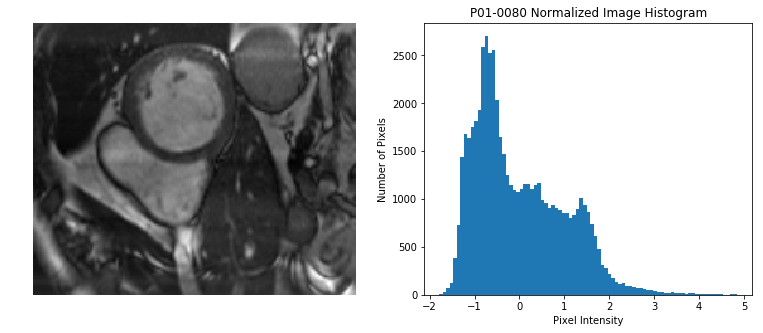

In [126]:
from skimage import exposure,img_as_float
images = imgdata.images
images_arr = np.asarray(images)[:,:,:,None].astype('float64')
image = images_arr[80]
img = np.asarray(255 * (image/image.max()))
#masks = imgdata.endo_masks
#print(len(imgdata.images))

def normalize(x, epsilon=1e-7, axis=(1,2)):
    x -= np.mean(x, axis=axis, keepdims=True)
    x /= np.std(x, axis=axis, keepdims=True) + epsilon
    
normalize(img)
#print(images_arr[0].shape)
#for (image,mask) in zip(images,masks):
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.axis("off")
plt.imshow(img[:,:,0], cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.title('P01-0080 Normalized Image Histogram')
plt.ylabel('Number of Pixels')
plt.xlabel('Pixel Intensity')
plt.hist(img.ravel(),bins='auto')
plt.savefig("normalized-histogram.png")

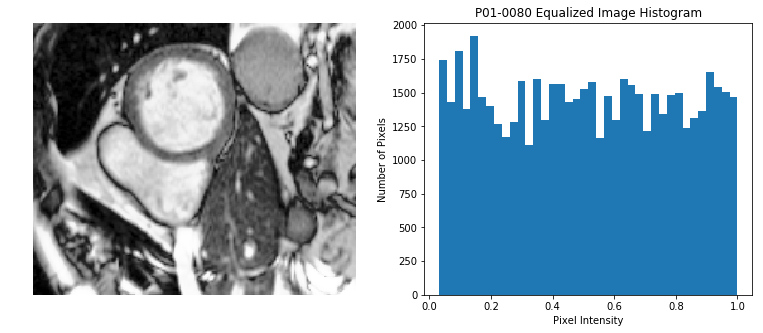

In [134]:
from skimage import exposure,img_as_float
from skimage.filters import rank
from skimage.morphology import disk

image = imgdata.images[80]
img = np.asarray(255 * (image/image.max()), dtype='float64')

selem = disk(40)
eq_img = exposure.equalize_hist(img)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.axis("off")
plt.imshow(eq_img, cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.title('P01-0080 Equalized Image Histogram')
plt.ylabel('Number of Pixels')
plt.xlabel('Pixel Intensity')
plt.hist(eq_img.ravel(),bins='auto')
plt.savefig("equalized-histogram.png")